# Laboratorio 1: Regresión en Boston
### Grupo 23

**Integrantes:** Franco Amilcar Genolet (francogeno97@gmail.com), Fabian Alejandro Zapata Cerutti (fzc501@gmail.com), Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com), María Laura Mantovani (mantovanimlaura@gmail.com).

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Conjunto de Datos

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\Naranja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

Al cargar el dataset, nos llega una alerta de que será eliminado por cuestiones éticas. Con la siguiente línea de código examinamos las variables que contiene y la explicación de cada una:

In [3]:
print(boston['DESCR'])   

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Vemos que tenemos 13 variables explicativas, 1 variable respuesta (MEDV) y 506 registros (instancias). Vemos qué tipo de objeto es boston:

In [4]:
type(boston)

sklearn.utils.Bunch

Se trata de un objeto contenedor ("Bunch"). Podemos acceder a su conteindo usando claves, como por ejemplo:

In [5]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split

X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1.   El dataset tiene datos de 506 casas de Boston, sus precios y otras 13 características que se quiere ver si ayudan a explicar el comportamiento de los precios. El formato del conjunto de datos es Bunch: un objeto contenedor al que se accede llamando a sus atributos con llaves. Con el código "boston['data']" accedemos a la matriz con los datos de entrada (atributos). Dicha matriz está en formato array (arreglo). 

2.   La variable a predecir es MEDV, que es la mediana del valor de viviendas en propiedad (en miles de dólares). Accedemos a ella con el código "boston['target']", y al igual que los datos de las características, está en formato array.

3.   Hay 13 atributos que podrían ser usados para hacer la predicción, a saber:

>01- CRIM: Índice de criminalidad per capita<br>
> 02- ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).<br>
> 03- INDUS: Proporción de superficie de negocio no minorista.<br>
> 04- CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)<br>
> 05- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)<br>
> 06- RM: Número promedio de habitaciones por vivienda<br>
> 07- AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940<br>
> 08- DIS: Distancias ponderadas a cinco centros de empleo de Boston<br>
> 09- RAD: Índice de accesibilidad a las autopistas radiales<br>
> 10- TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.<br>
> 11- PTRATIO: Ratio de alumnos por profesor<br>
> 12- B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana<br>
> 13- LSTAT: Porcentaje de población de “estatus de bajo nivel”

4.   Leyendo las descripciones de las variables, pareciera que las más determinantes serán índice de criminalidad (CRIM), la proporcion de negocios cerca de la zona (INDUS), y la distancia a centros de empleo (DIS).

5.   La variable B asume que la auto-segregación racial podría generar un impacto en el precio de las viviendas, lo cual generaría sesgo racial en el análisis. Además, la variable LSTAT podría ser discutible en función a la definición subjetiva de qué se considera como "estatus de bajo nivel".

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

1. A continuación generamos una figura que contiene las gráficas de las 13 características con respecto a la variable target.

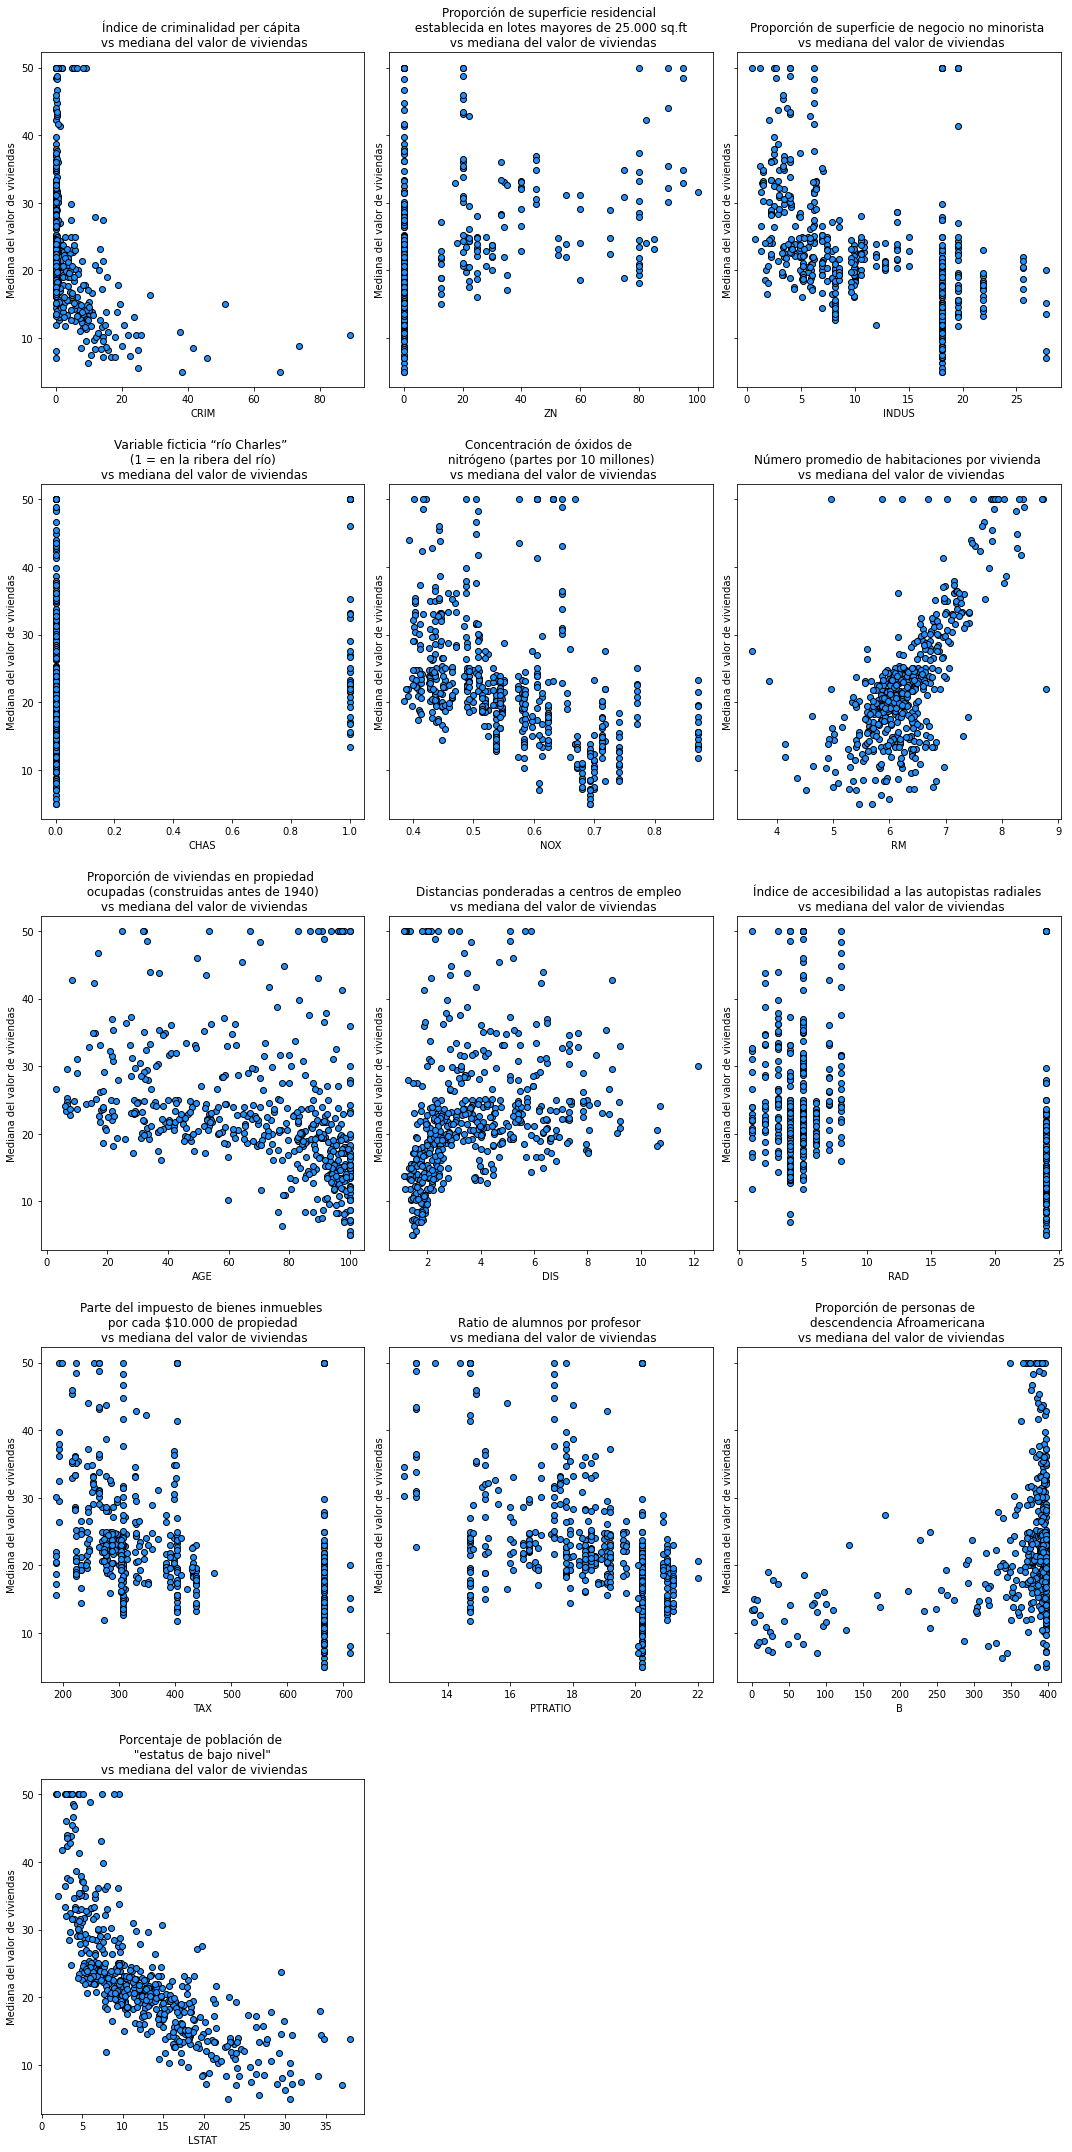

In [7]:
fig, ax = plt.subplots(5, 3, figsize=(15,30), sharey=True)
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

ax[0,0].scatter(X[:, (boston['feature_names'] == features[0])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[0,0].set_xlabel(features[0])
ax[0,0].set_ylabel("Mediana del valor de viviendas")
ax[0,0].set_title('Índice de criminalidad per cápita \n vs mediana del valor de viviendas')

ax[0,1].scatter(X[:, (boston['feature_names'] == features[1])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[0,1].set_xlabel(features[1])
ax[0,1].set_ylabel("Mediana del valor de viviendas")
ax[0,1].set_title('Proporción de superficie residencial \n establecida en lotes mayores de 25.000 sq.ft \n vs mediana del valor de viviendas')

ax[0,2].scatter(X[:, (boston['feature_names'] == features[2])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[0,2].set_xlabel(features[2])
ax[0,2].set_ylabel("Mediana del valor de viviendas")
ax[0,2].set_title('Proporción de superficie de negocio no minorista \n vs mediana del valor de viviendas')

ax[1,0].scatter(X[:, (boston['feature_names'] == features[3])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[1,0].set_xlabel(features[3])
ax[1,0].set_ylabel("Mediana del valor de viviendas")
ax[1,0].set_title('Variable ficticia “río Charles” \n (1 = en la ribera del río) \n vs mediana del valor de viviendas')

ax[1,1].scatter(X[:, (boston['feature_names'] == features[4])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[1,1].set_xlabel(features[4])
ax[1,1].set_ylabel("Mediana del valor de viviendas")
ax[1,1].set_title('Concentración de óxidos de \n nitrógeno (partes por 10 millones) \n vs mediana del valor de viviendas')

ax[1,2].scatter(X[:, (boston['feature_names'] == features[5])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[1,2].set_xlabel(features[5])
ax[1,2].set_ylabel("Mediana del valor de viviendas")
ax[1,2].set_title('Número promedio de habitaciones por vivienda \n vs mediana del valor de viviendas')

ax[2,0].scatter(X[:, (boston['feature_names'] == features[6])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[2,0].set_xlabel(features[6])
ax[2,0].set_ylabel("Mediana del valor de viviendas")
ax[2,0].set_title('Proporción de viviendas en propiedad \n ocupadas (construidas antes de 1940) \n vs mediana del valor de viviendas')

ax[2,1].scatter(X[:, (boston['feature_names'] == features[7])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[2,1].set_xlabel(features[7])
ax[2,1].set_ylabel("Mediana del valor de viviendas")
ax[2,1].set_title('Distancias ponderadas a centros de empleo \n vs mediana del valor de viviendas')

ax[2,2].scatter(X[:, (boston['feature_names'] == features[8])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[2,2].set_xlabel(features[8])
ax[2,2].set_ylabel("Mediana del valor de viviendas")
ax[2,2].set_title('Índice de accesibilidad a las autopistas radiales \n vs mediana del valor de viviendas')

ax[3,0].scatter(X[:, (boston['feature_names'] == features[9])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[3,0].set_xlabel(features[9])
ax[3,0].set_ylabel("Mediana del valor de viviendas")
ax[3,0].set_title('Parte del impuesto de bienes inmuebles \n por cada $10.000 de propiedad \n vs mediana del valor de viviendas')

ax[3,1].scatter(X[:, (boston['feature_names'] == features[10])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[3,1].set_xlabel(features[10])
ax[3,1].set_ylabel("Mediana del valor de viviendas")
ax[3,1].set_title('Ratio de alumnos por profesor \n vs mediana del valor de viviendas')

ax[3,2].scatter(X[:, (boston['feature_names'] == features[11])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[3,2].set_xlabel(features[11])
ax[3,2].set_ylabel("Mediana del valor de viviendas")
ax[3,2].set_title('Proporción de personas de  \ndescendencia Afroamericana \n vs mediana del valor de viviendas')

ax[4,0].scatter(X[:, (boston['feature_names'] == features[12])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[4,0].set_xlabel(features[12])
ax[4,0].set_ylabel("Mediana del valor de viviendas")
ax[4,0].set_title('Porcentaje de población de \n "estatus de bajo nivel" \n vs mediana del valor de viviendas')

ax[4,1].set_axis_off()
ax[4,2].set_axis_off()

fig.tight_layout(h_pad=2)
plt.show()

**Atributos más informativos para la predicción, en orden de importancia:**

1. RM: A priori, el atributo RM parece ser el más fuertemente correlacionado con la variable MEDV. Analizando la gráfica, se observa claramente como al aumentar el número promedio de habitaciones por vivienda, aumenta también la mediana del valor de las viviendas, formando los datos una nube de puntos que se acomoda en una diagonal.

2. CRIM: También se puede ver, aunque algo menos definido que con la variable RM, que la mediana del valor de viviendas cae a medida que aumenta el ínidice de criminalidad per cápita. Sin embargo, el gráfico también muestra que hay gran variabilidad en la mediana de precios de vivienda (entre 25 y 50 miles de dólares) para valores de CRIM muy próximos o iguales a cero. Además, la cantidad de registros asociados a índices altos de criminalidad parecen ser pocos y se encuentran algo separados como para sacar conclusiones.

3. INDUS y NOX, ambas presentan nubes de puntos algo más dispersas, pero se observa que el valor de MEDV cae a medida que estas aumentan, por lo que consideramos que estas variables pueden ser informativas en la predicción. 

4. Para el resto de variables (excepto LSTAT, que se explica a continuación), la gráfica muestra nubes de puntos menos definidas. La relación en principio parece poco clara. 

5. En cuanto a LSTAT, si únicamente nos guiamos por la gráfica, esta característica muestra una fuerte tendencia opuesta a la observada para la variable RM, y pareciera ser muy informativa para la predicción de la variable MEDV. Sin embargo, entendiendo que la variable fue el resultado de una construcción subjetiva, consideramos prudente no incorporarla ya que podría estar acentuando la predicción empujada por prejuicios sociales en dicha construcción.

Como complementario al análisis de las gráficas, el siguiente código genera un ranking para elegir la característica que mejor predice la variable target:

In [8]:
estimator = SVR(kernel="linear")
selector_feature = RFE(estimator, n_features_to_select=1, step=1)
selector_feature = selector_feature.fit(X_train, y_train)

In [9]:
selector_feature.ranking_

array([ 7,  9,  8,  3,  2,  1, 10,  6, 12, 13,  4, 11,  5])

Segun este ranking, la característica más informativa para predecir la variable MEDV es RM, que se encuentra en la posiición 5 del array.

In [10]:
for i in range(len(features)):
    if selector_feature.support_[i] == True:
        print("The feature {} is THE BEST fit for a lineal regresion model and its ranking is: {}\n".format(features[i], selector_feature.ranking_[i]))
    else:
        print("The feature {} is the NOT the best fit for a lineal regresion model and its ranking is: {}\n".format(features[i], selector_feature.ranking_[i]))
        

The feature CRIM is the NOT the best fit for a lineal regresion model and its ranking is: 7

The feature ZN is the NOT the best fit for a lineal regresion model and its ranking is: 9

The feature INDUS is the NOT the best fit for a lineal regresion model and its ranking is: 8

The feature CHAS is the NOT the best fit for a lineal regresion model and its ranking is: 3

The feature NOX is the NOT the best fit for a lineal regresion model and its ranking is: 2

The feature RM is THE BEST fit for a lineal regresion model and its ranking is: 1

The feature AGE is the NOT the best fit for a lineal regresion model and its ranking is: 10

The feature DIS is the NOT the best fit for a lineal regresion model and its ranking is: 6

The feature RAD is the NOT the best fit for a lineal regresion model and its ranking is: 12

The feature TAX is the NOT the best fit for a lineal regresion model and its ranking is: 13

The feature PTRATIO is the NOT the best fit for a lineal regresion model and its ra

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

1. A partir de las observaciones realizadas en el ejercicio anterior, se selecciona el atributo "RM" como el más apropiado.

In [11]:
feature = 'RM' 
selector = (boston['feature_names'] == feature)
X_train_rm = X_train[:, selector]
X_test_rm = X_test[:, selector]
X_train_rm.shape, X_test_rm.shape

((404, 1), (102, 1))

2. A continuación se instancia y entrena la regresión lineal usando el atributo seleccionado

In [12]:
# Se definen algunas funciones que servirán para instanciar y predecir
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias (1, x)
    return X_b.dot(w)

In [13]:
# Se instancia y entrena la regresión lineal usando el atributo seleccionado
w = linear_least_squares(X_train_rm.flatten(), y_train)
# Se imprimen los parámetros estimados con el modelo entrenado
print(w)

[  9.37638431 -36.47618963]


In [14]:
# Se obtienen los valores predichos para los datos de y de evaluación.
y_train_pred = f(X_train_rm.flatten(), w)
y_test_pred = f(X_test_rm.flatten(), w)

3. A continuación se calcula el error cuadrático medio para los conjuntos de entrenamiento y evaluación.

In [15]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 42.820479
Test error: 46.907352


4. A continuación, se grafica el modelo resultante, junto con los puntos de entrenamiento y evaluación.

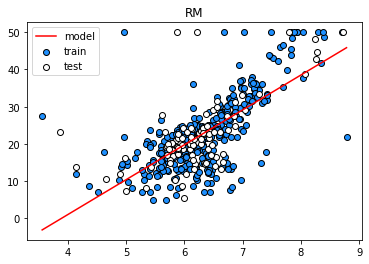

In [16]:
x_start = min(np.min(X_train_rm.flatten()), np.min(X_test_rm))
x_end = max(np.max(X_train_rm.flatten()), np.max(X_test_rm))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x.flatten(), f(x.flatten(), w), color="red", label="model")

plt.scatter(X_train_rm, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_rm, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

5. Se observa que en su mayoría, tanto los puntos de entrenamiento como los de prueba, se agrupan en torno a la diagonal (modelo). En principio es un modelo aceptable para explicar la relación entre ambas variables. Sin embargo algunos de los puntos se alejan bastante de la recta que contiene los valores predichos, haciendo que no sea un modelo muy preciso. Tal vez sería necesario añadir bandas de confianza para la recta.

En cuanto al error, se observa que el del conjunto de test (42.8) es un poco más alto que el de entrenamiento (46.9). Es necesario comparar estos resultados con los que se obtengan en los siguientes modelos.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

1. Se realizará a cabo el ejercicio para los grados de polinomio entre 0 y 9. El caso del polinomio de 1er grado sería equivalente al ejercicio anterior.


In [17]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # 1. Instanciamos y entrenamos la regresión polinomial:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_rm, y_train)
    
    # 2. Predecimos:
    y_train_pred = model.predict(X_train_rm)
    y_test_pred = model.predict(X_test_rm)
    
    # Calculamos el error en entrenamiento y evaluación
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # 3. guardamos los errores en una lista:
    train_errors.append(train_error)
    test_errors.append(test_error)

In [18]:
# Imprimimos los errores:
train_errors, test_errors

([85.1437202235075,
  42.8204789417275,
  37.74552897028125,
  36.395658757671,
  34.80844625691349,
  33.131121571954914,
  33.130116415579074,
  33.0603587646937,
  33.06035722561689,
  32.854885493706114],
 [81.58231743908232,
  46.90735162739531,
  39.794731163726624,
  39.82576208821715,
  41.55392567589451,
  41.03828856935067,
  41.00917696010345,
  42.39410935716233,
  42.399257253879284,
  46.05126028248193])

2. Graficamos las curvas de error en términos del grado del polinomio:

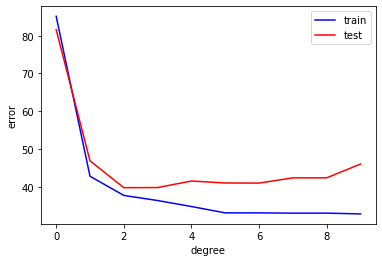

In [19]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

3. En la gráfica se observa que ambos errores disminuyen hasta que el polinomio alcanza el grado 2. Entre el 2 y el 3 el error de test se mantiene casi constante y en el polinomio de grado 4 empieza a aumentar levemente. Entendemos que el resultado óptimo debe estar entre el polinomio de grado 2 y el de grado 3. Veamos sus gráficas en el punto que sigue para elegir el mejor.

4. Para elegir el mejor modelo evaluamos el la regresión polinomial de grado 2 y de grado 3:

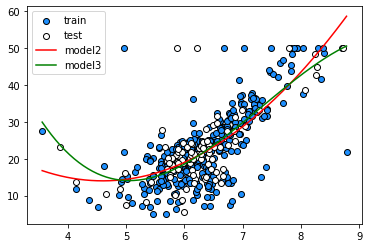

In [20]:
pf2 = PolynomialFeatures(2)
pf3 = PolynomialFeatures(3)
lr = LinearRegression(fit_intercept=False)  
model2 = make_pipeline(pf2, lr)
model2.fit(X_train_rm, y_train)

plt.scatter(X_train_rm, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_rm, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, model2.predict(x.reshape(-1, 1)), color="red", label="model2")

model3 = make_pipeline(pf3, lr)
model3.fit(X_train_rm, y_train)
plt.plot(x, model3.predict(x.reshape(-1, 1)), color="green", label="model3")
plt.legend()
plt.show()

Ambas curvas son similares, pero la curva verde (polinomio de grado 3) se ajusta más a los datos tanto en el extremo inferior de la variable RM (valores por debajo de 5) como en su extremo superior (valores por encima de 8). El modelo más apropiado pareciera ser el de grado 3. Además, si analizamos los errores que se imprimieron en el punto 1 de este ejercicio, vemos que para el polinomio de grado 3, tanto el error de entrenamiento (36.4) como el de test (39.83) son menores que dichos errores para el polinomio de grado 2 (37.75 y 39.83 respectivamente).

5. La curva del modelo seleccionado (regresión polinomial de grado 3) muestra que si bien la tendencia general es que al aumentar el número promedio de habitaciones por vivienda, aumenta también la mediana del valor por vivienda, tal incremento se aplana levemente luego de superar las 8 habitaciones promedio. Asimismo, cuando el promedio de habitaciones es menor a 5 la curva cambia para tener una relación opuesta: la mediana del valor por vivienda aumenta levemente a medida que el promedio de habitaciones se aproxima a cero.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

1. Se seleccionan 4 variables: RM, CRIM, NOX e INDUS:

In [21]:
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'NOX') | (boston['feature_names'] == 'INDUS')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 4), (102, 4))

2. Instanciamos y entrenamos el modelo, predecimos y calculamos los errores de entrenamiento y de test:

In [22]:
# fit model:
lr = LinearRegression(fit_intercept=False)  
model=lr.fit(X_train_fs,y_train)

# predict:
y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)
    
# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 35.928780
Test error: 52.391160


3. El modelo resultante es peor que los que se probaron antes, ya que tanto su error de entrenamiento como el de test es más alto. Esto quiere decir que las variables que se añadieron no están ayudando sino obstaculizando la predicción. 

## Más ejercicios (opcionales)
### Ejercicio 6: A Todo Feature
Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [23]:
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'ZN') | \
            (boston['feature_names'] == 'INDUS') | (boston['feature_names'] == 'CHAS') |\
            (boston['feature_names'] == 'NOX') | (boston['feature_names'] == 'RM') | \
            (boston['feature_names'] == 'AGE') | (boston['feature_names'] == 'DIS') | \
            (boston['feature_names'] == 'RAD') | (boston['feature_names'] == 'TAX') | \
            (boston['feature_names'] == 'PTRATIO') | (boston['feature_names'] == 'B') | (boston['feature_names'] == 'LSTAT')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 13), (102, 13))

In [24]:
# fit model:
lr = LinearRegression(fit_intercept=False)  
model=lr.fit(X_train_fs,y_train)

# predict:
y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)
    
# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 21.684171
Test error: 36.115318


Se observa que el modelo que incorpora las 13 características tiene errores más bajos que todos los antes evaluados. Cabe destacar no obstante que el error de test es un poco más alto que el de entrenamiento, por lo que podríamos estar sobreajustando el modelo (podría ser necesario aplicar un término de regularización. Además, estamos incluyendo las variables que vimos que tenían problemas de sesgo racial y social.